# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as pl
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
# models
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
df= pd.read_csv('/Users/sreelekha.santhanam/Downloads/carProject/data/vehicles.csv')



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [11]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [12]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [55]:
df=df.drop(columns=['id','region','model','title_status','VIN','size','state'])

In [56]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
215,4000,2002,35,0,3,2,155000,0,1,9,1
268,9000,2008,22,0,3,2,56700,0,2,2,10
337,8950,2011,10,0,5,2,164000,0,1,10,10
355,9400,2008,23,2,5,2,129473,0,2,9,9
364,7300,2007,20,2,5,2,181000,0,1,0,10


In [57]:
df.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [58]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28264 entries, 215 to 426793
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         28264 non-null  int64
 1   year          28264 non-null  int64
 2   manufacturer  28264 non-null  int64
 3   condition     28264 non-null  int64
 4   cylinders     28264 non-null  int64
 5   fuel          28264 non-null  int64
 6   odometer      28264 non-null  int64
 7   transmission  28264 non-null  int64
 8   drive         28264 non-null  int64
 9   type          28264 non-null  int64
 10  paint_color   28264 non-null  int64
dtypes: int64(11)
memory usage: 2.6 MB


In [60]:
df['year']=df['year'].astype(int)
df['odometer']=df['odometer'].astype(int)

le=LabelEncoder()

df['manufacturer']=le.fit_transform(df['manufacturer'])
df['condition']=le.fit_transform(df['condition'])
df['cylinders']=le.fit_transform(df['cylinders'])
df['fuel']=le.fit_transform(df['fuel'])
df['transmission']=le.fit_transform(df['transmission'])
df['drive']=le.fit_transform(df['drive'])
df['type']=le.fit_transform(df['type'])
df['paint_color']=le.fit_transform(df['paint_color'])

df.head()


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
215,4000,2002,35,0,3,2,155000,0,1,9,1
268,9000,2008,22,0,3,2,56700,0,2,2,10
337,8950,2011,10,0,5,2,164000,0,1,10,10
355,9400,2008,23,2,5,2,129473,0,2,9,9
364,7300,2007,20,2,5,2,181000,0,1,0,10


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

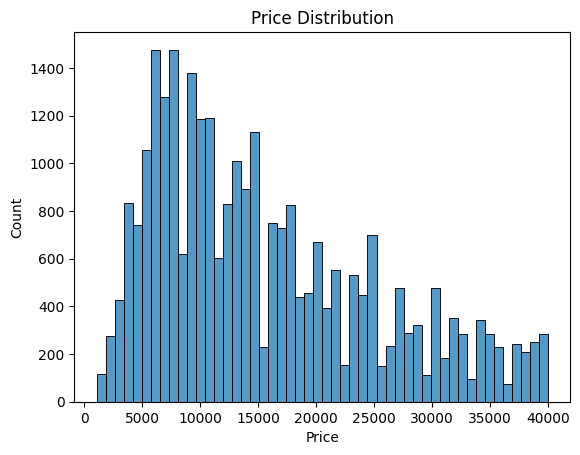

In [61]:
sns.histplot(data=df.query('price<200000'), x="price",bins=50)
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show()

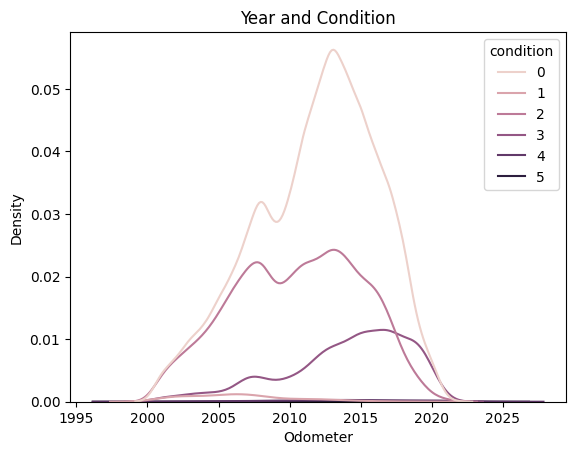

In [33]:
sns.kdeplot(data=df, x="year", hue="condition")
plt.xlabel("Odometer")
plt.title("Year and Condition")
plt.show()

In [62]:
df.describe(percentiles = [.05,.1, .9,.95])


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,28264.000000,28264.000000,28264.000000,28264.000000,28264.000000,28264.00000,2.826400e+04,28264.000000,28264.000000,28264.000000,28264.000000
mean,15599.989527,2011.654437,16.263126,0.988254,4.500885,1.88986,1.115277e+05,0.058095,0.753397,6.083038,5.787220
std,9577.249518,4.483577,10.643742,1.174992,1.325464,0.50382,6.088958e+04,0.263785,0.766224,4.350128,4.005588
min,1095.000000,2001.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,3995.000000,2004.000000,4.000000,0.000000,3.000000,0.00000,2.301000e+04,0.000000,0.000000,0.000000,0.000000
10%,5000.000000,2005.000000,6.000000,0.000000,3.000000,2.00000,3.820430e+04,0.000000,0.000000,0.000000,0.000000
50%,12999.000000,2012.000000,11.000000,0.000000,5.000000,2.00000,1.090730e+05,0.000000,1.000000,9.000000,8.000000
90%,30750.000000,2017.000000,35.000000,3.000000,6.000000,2.00000,1.795778e+05,0.000000,2.000000,10.000000,10.000000
95%,34990.850000,2018.000000,35.000000,3.000000,6.000000,2.00000,2.047510e+05,1.000000,2.000000,11.000000,10.000000
max,39999.000000,2022.000000,37.000000,5.000000,7.000000,4.00000,1.795320e+06,2.000000,2.000000,12.000000,11.000000


In [63]:
df=df[df['price'] > 1000]
df=df[df['price'] < 40000]
df=df[df['year']  > 2000]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28264 entries, 215 to 426793
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         28264 non-null  int64
 1   year          28264 non-null  int64
 2   manufacturer  28264 non-null  int64
 3   condition     28264 non-null  int64
 4   cylinders     28264 non-null  int64
 5   fuel          28264 non-null  int64
 6   odometer      28264 non-null  int64
 7   transmission  28264 non-null  int64
 8   drive         28264 non-null  int64
 9   type          28264 non-null  int64
 10  paint_color   28264 non-null  int64
dtypes: int64(11)
memory usage: 2.6 MB


In [64]:
df.describe(percentiles = [.05,.1, .9,.95])


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,28264.000000,28264.000000,28264.000000,28264.000000,28264.000000,28264.00000,2.826400e+04,28264.000000,28264.000000,28264.000000,28264.000000
mean,15599.989527,2011.654437,16.263126,0.988254,4.500885,1.88986,1.115277e+05,0.058095,0.753397,6.083038,5.787220
std,9577.249518,4.483577,10.643742,1.174992,1.325464,0.50382,6.088958e+04,0.263785,0.766224,4.350128,4.005588
min,1095.000000,2001.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,3995.000000,2004.000000,4.000000,0.000000,3.000000,0.00000,2.301000e+04,0.000000,0.000000,0.000000,0.000000
10%,5000.000000,2005.000000,6.000000,0.000000,3.000000,2.00000,3.820430e+04,0.000000,0.000000,0.000000,0.000000
50%,12999.000000,2012.000000,11.000000,0.000000,5.000000,2.00000,1.090730e+05,0.000000,1.000000,9.000000,8.000000
90%,30750.000000,2017.000000,35.000000,3.000000,6.000000,2.00000,1.795778e+05,0.000000,2.000000,10.000000,10.000000
95%,34990.850000,2018.000000,35.000000,3.000000,6.000000,2.00000,2.047510e+05,1.000000,2.000000,11.000000,10.000000
max,39999.000000,2022.000000,37.000000,5.000000,7.000000,4.00000,1.795320e+06,2.000000,2.000000,12.000000,11.000000


In [65]:
df.corr()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.000000,0.531561,-0.106663,0.055796,0.313966,-0.297146,-0.384554,-0.021822,-0.114769,0.125179,0.095622
year,0.531561,1.000000,-0.032668,0.017853,-0.179867,0.082017,-0.462670,-0.095929,-0.066755,0.015028,0.037812
manufacturer,-0.106663,-0.032668,1.000000,-0.048940,-0.230454,0.054494,0.016055,0.062354,-0.082578,-0.037752,-0.050101
condition,0.055796,0.017853,-0.048940,1.000000,0.031585,-0.030097,-0.037827,0.004827,0.059151,0.044306,0.054731
cylinders,0.313966,-0.179867,-0.230454,0.031585,1.000000,-0.199627,0.170817,-0.086670,-0.047723,0.102124,0.040480
fuel,-0.297146,0.082017,0.054494,-0.030097,-0.199627,1.000000,-0.126456,-0.008027,0.054747,-0.176798,-0.097995
odometer,-0.384554,-0.462670,0.016055,-0.037827,0.170817,-0.126456,1.000000,-0.004963,-0.083404,0.022300,0.001802
transmission,-0.021822,-0.095929,0.062354,0.004827,-0.086670,-0.008027,-0.004963,1.000000,0.042700,-0.012005,-0.040037
drive,-0.114769,-0.066755,-0.082578,0.059151,-0.047723,0.054747,-0.083404,0.042700,1.000000,0.235324,0.135628
type,0.125179,0.015028,-0.037752,0.044306,0.102124,-0.176798,0.022300,-0.012005,0.235324,1.000000,0.132868


<Axes: >

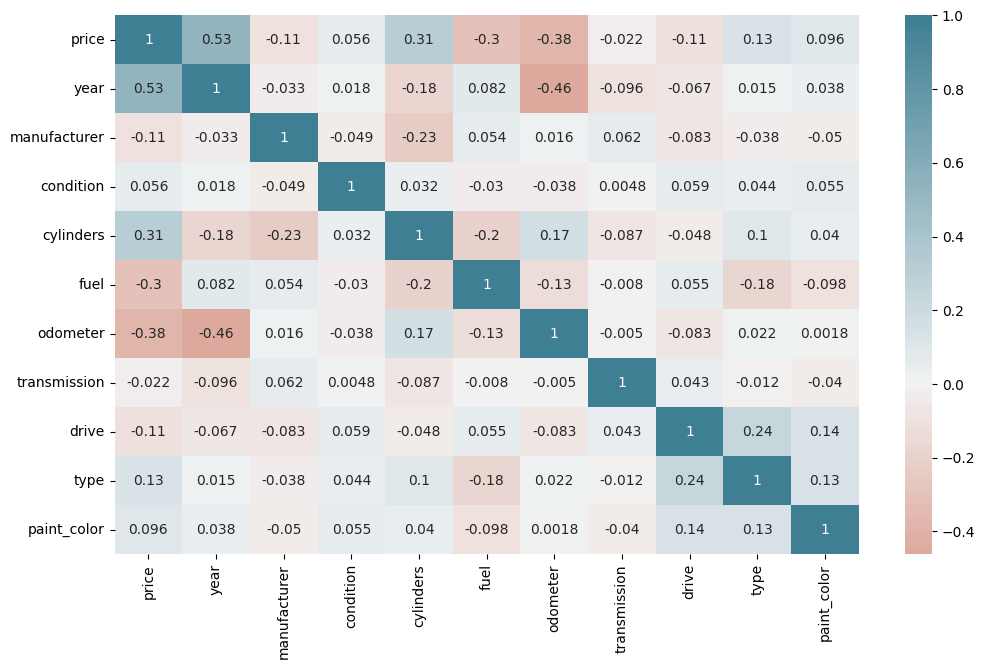

In [66]:
plt.subplots(figsize = (12,7))
sns.heatmap(df.corr(),annot=True,cmap=sns.diverging_palette(20, 220, n=200),center=0)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [68]:
y=df['price']
df.drop(columns=['price'],axis=1,inplace=True)

In [70]:
# Run the data through standard scaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X.head()

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,-2.153327,1.760396,-0.841087,-1.132367,0.218614,0.713966,-0.220241,0.321848,0.670558,-1.195157
1,-0.815086,0.539000,-0.841087,-1.132367,0.218614,-0.900460,-0.220241,1.626973,-0.938619,1.051744
2,-0.145966,-0.588443,-0.841087,0.376566,0.218614,0.861778,-0.220241,0.321848,0.900440,1.051744
3,-0.815086,0.632953,0.861082,0.376566,0.218614,0.294725,-0.220241,1.626973,0.670558,0.802089
4,-1.038126,0.351093,0.861082,0.376566,0.218614,1.140976,-0.220241,0.321848,-1.398383,1.051744


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28264 entries, 0 to 28263
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          28264 non-null  float64
 1   manufacturer  28264 non-null  float64
 2   condition     28264 non-null  float64
 3   cylinders     28264 non-null  float64
 4   fuel          28264 non-null  float64
 5   odometer      28264 non-null  float64
 6   transmission  28264 non-null  float64
 7   drive         28264 non-null  float64
 8   type          28264 non-null  float64
 9   paint_color   28264 non-null  float64
dtypes: float64(10)
memory usage: 2.2 MB


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784 entries, 23889 to 23654
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          19784 non-null  float64
 1   manufacturer  19784 non-null  float64
 2   condition     19784 non-null  float64
 3   cylinders     19784 non-null  float64
 4   fuel          19784 non-null  float64
 5   odometer      19784 non-null  float64
 6   transmission  19784 non-null  float64
 7   drive         19784 non-null  float64
 8   type          19784 non-null  float64
 9   paint_color   19784 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


In [74]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 19784 entries, 360132 to 357527
Series name: price
Non-Null Count  Dtype
--------------  -----
19784 non-null  int64
dtypes: int64(1)
memory usage: 309.1 KB


In [75]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8480 entries, 11034 to 5446
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          8480 non-null   float64
 1   manufacturer  8480 non-null   float64
 2   condition     8480 non-null   float64
 3   cylinders     8480 non-null   float64
 4   fuel          8480 non-null   float64
 5   odometer      8480 non-null   float64
 6   transmission  8480 non-null   float64
 7   drive         8480 non-null   float64
 8   type          8480 non-null   float64
 9   paint_color   8480 non-null   float64
dtypes: float64(10)
memory usage: 728.8 KB


In [76]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 8480 entries, 165001 to 91023
Series name: price
Non-Null Count  Dtype
--------------  -----
8480 non-null   int64
dtypes: int64(1)
memory usage: 132.5 KB


In [77]:
lin_reg = LinearRegression(fit_intercept=False)
model1 = lin_reg.fit(X, y)

y_predict = model1.predict(X)
linreg_mse = mean_squared_error(y,y_predict)
linreg_mae = mean_absolute_error(y,y_predict)
linreg_r2 = r2_score(y,y_predict)
print(linreg_r2)
# Create a dataframe and add the linear reg coefficients for each feature
score_coef=pd.DataFrame(zip(X.columns, model1.coef_))
score_coef.columns=["feature","Linear"]
score_coef

-2.0629633840427237


,feature,Linear
0,year,4794.627752
1,manufacturer,119.392985
2,condition,166.601194
3,cylinders,3738.879564
4,fuel,-2634.205699
5,odometer,-2512.442704
6,transmission,591.847944
7,drive,-860.758223
8,type,488.664996
9,paint_color,401.891223


In [78]:
# define a params list to perform grid search cross validation for ridge and lasso regressions
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
grid_cv_model = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True,verbose=1)
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

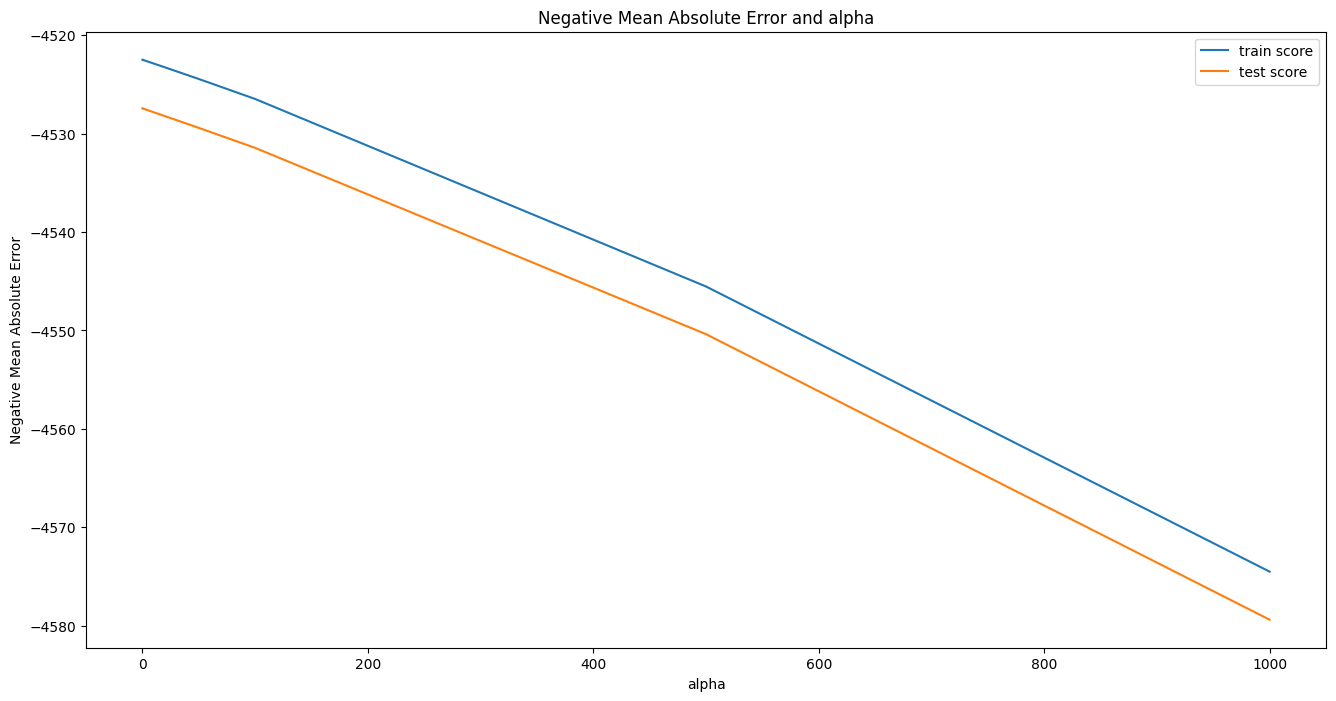

In [79]:
#plot the grid search cv results to determine the best value for alpha
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
cv_results.head()
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [80]:
grid_cv_model.best_params_


{'alpha': 0.0001}

In [81]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()
grid_cv_model = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True,verbose=1)
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                    10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()
grid_cv_model = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=5,return_train_score=True,verbose=1)
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

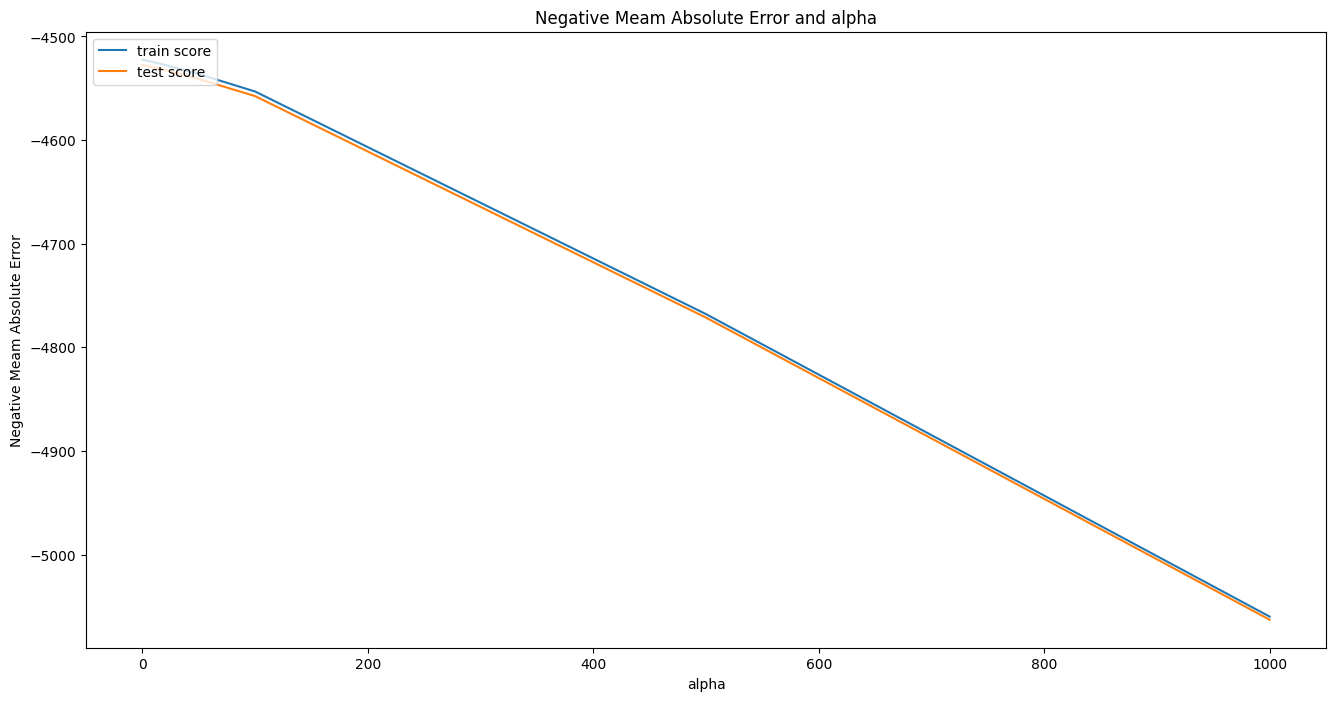

In [83]:
#plot the grid search cv results to determine the best value for alpha
cv_results = pd.DataFrame(grid_cv_model.cv_results_)
# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [84]:
grid_cv_model.best_params_

{'alpha': 0.0001}

In [85]:
#Create Lasso model
lass = linear_model.Lasso(alpha=0.0001)
model2 = lass.fit(X_train,y_train)
y_pred=model2.predict(X_train)
lass_mse=mean_squared_error(y_train,y_pred)
lass_mae=mean_absolute_error(y_train,y_pred)
lass_r2=r2_score(y_train,y_pred)
print("Coef",model2.coef_,"\n","MSE",lass_mse,"\n","MAE",lass_mae,"\n","R2 Score",lass_r2)
score_coef["lasso"]=pd.Series(model2.coef_)
score_coef

Coef [ 4759.41245121   100.04965328   173.72750529  3732.20848819
 -2623.47796663 -2570.92668173   666.44087764  -857.10682059
   492.71861754   409.09178581] 
 MSE 37276445.40021712 
 MAE 4522.863106988196 
 R2 Score 0.592132382371807


,feature,Linear,lasso
0,year,4794.627752,4759.412451
1,manufacturer,119.392985,100.049653
2,condition,166.601194,173.727505
3,cylinders,3738.879564,3732.208488
4,fuel,-2634.205699,-2623.477967
5,odometer,-2512.442704,-2570.926682
6,transmission,591.847944,666.440878
7,drive,-860.758223,-857.106821
8,type,488.664996,492.718618
9,paint_color,401.891223,409.091786


In [86]:
#create the ridge model
ridg = Ridge(alpha=0.0001)
model3 = ridg.fit(X_train,y_train)
y_pred=model3.predict(X_train)
ridg_mse=mean_squared_error(y_train,y_pred)
ridg_mae=mean_absolute_error(y_train,y_pred)
ridg_r2=r2_score(y_train,y_pred)
print("Coef",model3.coef_,"\n","MSE",ridg_mse,"\n","MAE",ridg_mae,"\n","R2 Score",ridg_r2)
score_coef["Ridge"]=pd.Series(model3.coef_)
score_coef

Coef [ 4759.41249626   100.04978127   173.72759813  3732.20860345
 -2623.47802022 -2570.92678578   666.44098835  -857.10695113
   492.71871408   409.09188321] 
 MSE 37276445.40021702 
 MAE 4522.863086790821 
 R2 Score 0.5921323823718082


,feature,Linear,lasso,Ridge
0,year,4794.627752,4759.412451,4759.412496
1,manufacturer,119.392985,100.049653,100.049781
2,condition,166.601194,173.727505,173.727598
3,cylinders,3738.879564,3732.208488,3732.208603
4,fuel,-2634.205699,-2623.477967,-2623.478020
5,odometer,-2512.442704,-2570.926682,-2570.926786
6,transmission,591.847944,666.440878,666.440988
7,drive,-860.758223,-857.106821,-857.106951
8,type,488.664996,492.718618,492.718714
9,paint_color,401.891223,409.091786,409.091883


<Axes: xlabel='feature'>

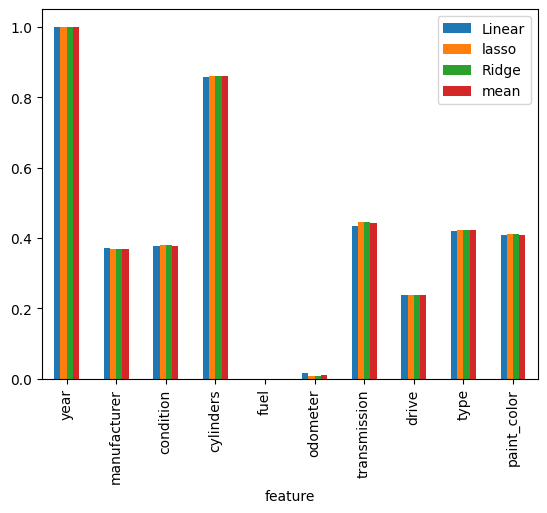

In [87]:
# Plot the feature importance
score_coef=score_coef.set_index('feature')
score_coef=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(score_coef),columns=score_coef.columns,index=score_coef.index)
score_coef['mean']=score_coef.mean(axis=1)
score_coef.plot(kind='bar')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


The plot indicates the importance of each feature in determining the car price, with some features having higher importance than others. 
Top 3 Important Features:

Year of manufacture
The number of cylinders in the car
Transmission


Other Important Features:

Paint color
Car type (van, suv, sedan, cuv etc)
Manufacturer
Condition

Findings:

Fuel Type: It's surprising that the fuel type (e.g., gasoline, diesel) does not have a significant impact on the car's price. This could suggest that other factors, such as efficiency or environmental concerns, are not major considerations for buyers in this dataset.
Odometer Mileage: Similarly, the odometer mileage, which typically reflects the car's usage and wear, is not a significant factor in determining the price. This could indicate that buyers are more focused on other aspects of the car's condition or features.
Overall, these findings provide valuable insights into the factors that drive car prices in the dataset. Understanding the relative importance of each feature can help stakeholders, such as car manufacturers, dealerships, and consumers, make informed decisions regarding pricing, marketing, and purchasing decisions.